In [21]:
import keras
from keras import layers

In [22]:
encoding_dim = 32 

In [23]:
input_img = keras.Input(shape=(784,))

In [24]:
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

In [25]:
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [26]:
autoencoder = keras.Model(input_img, decoded)

In [27]:
encoder = keras.Model(input_img, encoded)

In [28]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [29]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [30]:
from keras.datasets import mnist
import numpy as np 
(x_train, _),(x_test, _) = mnist.load_data()

In [31]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [32]:
autoencoder.fit(x_train, x_train, 
               epochs=50, 
               batch_size=256, 
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.2733 - val_loss: 0.1884
Epoch 2/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1706 - val_loss: 0.1538
Epoch 3/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.1443 - val_loss: 0.1338
Epoch 4/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.1289 - val_loss: 0.1217
Epoch 5/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.1187 - val_loss: 0.1131
Epoch 6/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.1114 - val_loss: 0.1071
Epoch 7/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1063 - val_loss: 0.1028
Epoch 8/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1026 - val_loss: 0.0998
Epoch 9/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.0999 - val_loss: 0.0975
Epoch

In [33]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [34]:
import matplotlib.pyplot as plt

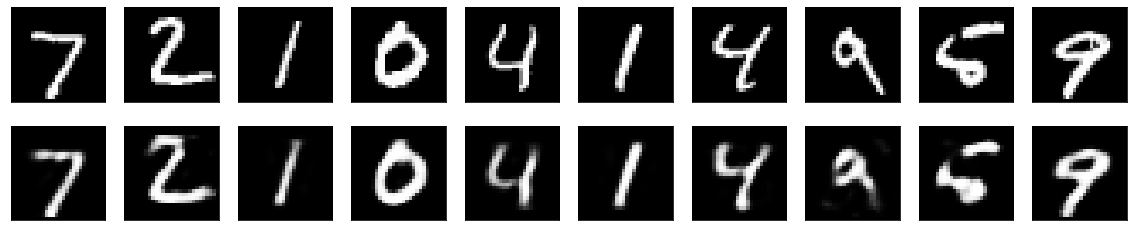

In [35]:
n = 10 
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()